## Exercises for the Discrete Fourier Transform (DFT) and the Fourier Transform (FT)
--- 


* [1. DFT](#DFT)
    * [Exercise 1.1](#Ex1_1)
    * [Exercise 1.2](#Ex1_2)
    * [Exercise 1.3](#Ex1_3)
* [2. FT](#FT)
    * [Exercise 2.1](#Ex2_1)
    * [Exercise 2.2](#Ex2_2)
    * [Exercise 2.3](#Ex2_3)

### 1 DFT <a class="anchor" id="DFT"></a>
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sp
from numpy.fft import fft2, fftshift, ifftshift, ifft2,fft,ifftshift, ifft

#### Exercise 1.1<a class="anchor" id="Ex1_1"></a>

A signal is sampled with $f_s=2$Hz for $T=3$s and is stored in Python in the array f. The python commands 

`from numpy.fft import fft, fftshift`<br>
`c = fftshift(fft(f))` 

yield the following output for c (Here we show only part of the overall result):
\begin{eqnarray*}
\begin{pmatrix}
1\\
2i \\
-2-i\\
5\\
\phantom{1+i+1}\\
\phantom{2-i}
\end{pmatrix}
\end{eqnarray*}

(a) Fill in the missing values.<br>
(b) Determine the Nyquist frequency $f_N$.<br>
(c) Draw by hand the output of the commands:

`f_s,T = 2,3`<br>
`freq = np.arange(-f_s/2,f_s/2,1/T)`<br>
`plt.plot(freqs,np.abs(c))`

Now consider the DFT-matrix $\mathbf{W}$ (the matrix used in the DFT via $\vec{c}=\frac{1}{N}\mathbf{W}\cdot \vec{f}$) with
$$
\mathbf{W}_{nk} = e^{-i2\pi\frac{nk}{N}}
$$

(d) In words: which information is contained in the DFT-matrix $\mathbf{W}$.<br>
(e) Sketch the real part for $N=4$ of $\mathbf{W}_{2k} $.



#### Exercise 1.2<a class="anchor" id="Ex1_2"></a>

Consider the following signal 

Text(0, 0.5, 'f(t)')

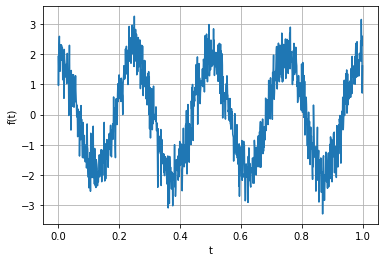

In [28]:
T = 1
f_signal = 4

t = np.linspace(0,T,1000)

def f(t):
    return 2*np.cos(2*np.pi*f_signal*t) + 0.5*np.random.randn(t.size)

plt.plot(t,f(t))
plt.grid()
plt.xlabel('t')
plt.ylabel('f(t)')

/home/jupyter-holger/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


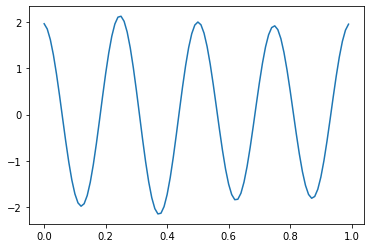

In [29]:
f_s = 100
c = fftshift(fft(f(np.arange(0,1,1/f_s))))
freq = np.arange(-f_s/2,f_s/2,1/T)
#plt.plot(np.abs(c))
f_max = np.abs(freq[np.argmax(np.abs(c))])
c[np.abs(freq)>f_max] = 0
#plt.plot(c)
f_mod = ifft(ifftshift(c))
plt.plot(np.arange(0,1,1/f_s),f_mod)

First, the signal is sampled with $f_s=10$Hz.

(a) Plot the sampled signal (i.e. the sample points) in the figure above.

Now, the signal is sampled with $f_s=100$Hz.

(b) Determine the Nyquist frequency $f_N$.<br>
(c) Sketch the Fourier spectrum (i.e. $|c_n|$ in the intervall $[-f_N,f_N]$).<br>
(d) Suppose you have given the signal in PYTHON as an array  $f$. Furthermore we have initialized the variable $f_s=100$. Write down a  PYTHON code, which plots the Fourier spectrum (i.e. $|c_n|$ in the intervall $[-f_N,f_N]$).<br>
(e) Perform a low-pass filtering in your PYTHON code as follows: 
- Find the frequency $f_{\mathrm{max}}$, which corresponds to the maximum $|c_n|$ in the spectrum
- Cut out all frequencies $f_n$ with $|f_n|>f_{\mathrm{max}}$ from the spectrum. 
- Transform the spectrum back to the time domain an plot the result. 

The same signal is now sampled with $f_s = 5$Hz!

(f)  Sketch the Fourier spectrum again! Note: First determine the alias frequency. 

#### Exercise 1.3<a class="anchor" id="Ex1_3"></a>

(a) Consider Python code below and sketch the output (to check your result delete the hash (#) character in line 12).<br>
(b) Explain in your own words what calculation is performed internally with the `scipy.signal.stft()` command.

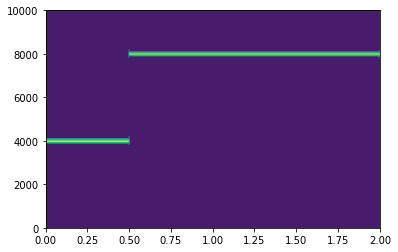

In [30]:
fs = 20000
T=2
t1 = np.arange(0,T/4,1/fs) 
t2 = np.arange(T/4,T,1/fs)
f1 = 4000 
f2 = 8000
s1 = np.sin(2*np.pi*f1*t1) 
s2 = np.sin(2*np.pi*f2*t2)
t = np.hstack((t1,t2)) 
s = np.hstack((s1,s2))
f,t,S = sp.stft(s,fs) 
plt.contourf(t, f, np.abs(S))

(c) The following shows an (512\times 512) gray-scale of image and its corresponding 2D-DFT. 
- What will hapen to the image, if you perform a high-pass filter to its spectrum. Sketch the output by hand.
- Perform such a high pass-filter  with a Python code.

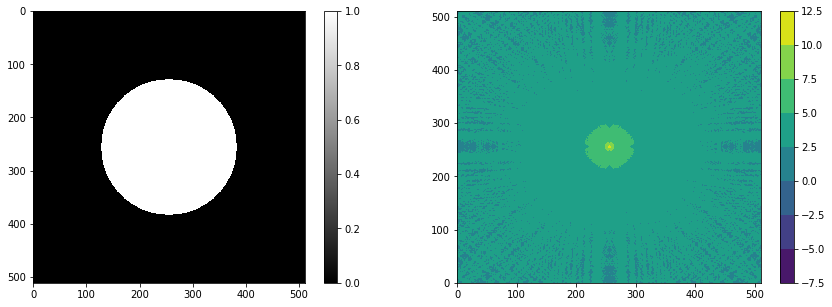

In [4]:
x,y = np.meshgrid(np.linspace(-1,1,512),np.linspace(-1,1,512))
I = np.zeros(x.shape)
I[np.sqrt(x**2+y**2)<.5]=1

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.colorbar()


c = fftshift(fft2(I))
plt.subplot(1,2,2)
plt.contourf(np.log(np.abs(c+0.1)))
plt.colorbar()


### 2 FT <a class="anchor" id="FT"></a>
---

#### Exercise 2.1 <a class="anchor" id="Ex2_1"></a>

(a) Calculate the Fourier transform of $F(\omega)$ of the functions
$$
(i)\,f(t) = \delta(t+3), \qquad (ii)\, f(t) = 2
$$
(b) Calculate (!) the Fourier transform $F(\omega)$ and sketch $|F(\omega)|$ of the function
\$$
f(t) = 2\sin(3t).
$$
(c) For the Fouriertransform  of a pair 
$$
f(t)\,\,\laplace\,\, F(\omega)
$$
the following relation holds
$$
 f(\beta t)  \quad  \laplace  \quad \frac{1}{|\beta|}F\left( \frac{\omega }{\beta} \right)\,.
$$
The figure below (left hand side) shows $f(t)=e^{-t^2}$ and its corresponding Fourier transform $F(\omega)$ (right hand side). Plot $f(\beta t)$  and 
its corresponding Fourier Transform for $\beta = \frac{1}{2}$ in the figure below.

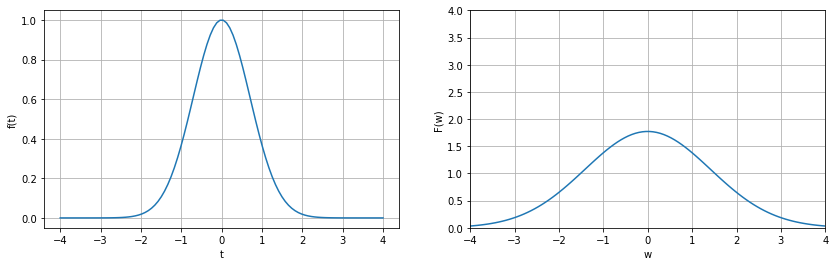

In [5]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
t = np.linspace(-4,4,100)
plt.plot(t,np.exp(-t**2))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.subplot(1,2,2)
w = np.linspace(-4,4,100)
plt.plot(w,np.sqrt(np.pi)*np.exp(-w**2/4))
plt.axis([-4,4,0,4])
plt.xlabel('w')
plt.ylabel('F(w)')
plt.grid()

#### Exercise 2.2 <a class="anchor" id="Ex2_2"></a>

(a) What is the effect in the time domain, when you convolve a signal with a Gaussian filter? What happens to noise and what happens to sharp edges?<br>
(b) Consider the following Python code
- Sketch the outcome of command line 6 (to check your result delete the hash (#) character).
- Sketch the outcome of command line 20 (to check your result delete the hash (#) character).

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


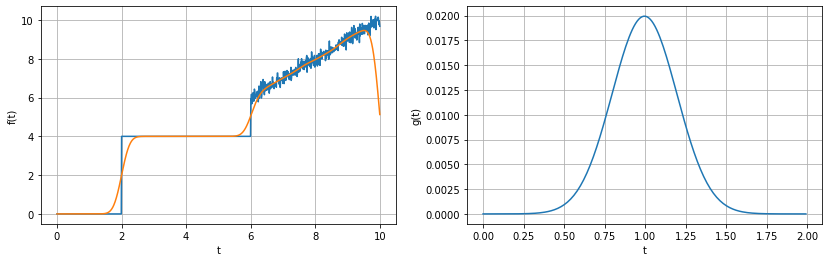

In [4]:
x = np.linspace(0,10,1000)
y = np.piecewise(x, [x < 2, x>2,  x > 6], [0, 4, lambda x: x+0.2*np.random.randn(x.size)])

plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
plt.plot(x,y)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()

plt.subplot(1,2,2)
g = sp.gaussian(200,20)
g = g/np.sum(g)
plt.plot(x[:g.size],g)
plt.xlabel('t')
plt.ylabel('g(t)')
plt.grid()

plt.subplot(1,2,1)
plt.plot(x,np.convolve(g,y,mode='same'))

(c)  What is the output of the following Python command lines (to check your result delete the hash (#) character in line 3)?

In [ ]:
a = np.array([0.5,0.5])
b = np.array([1,3,5,-1])
# sp.convolve(a,b,mode='valid')

#### Exercise 2.3 <a class="anchor" id="Ex2_3"></a>
Consider an LTI system with transfer function
$$
H(w) = \frac{2(i\omega)}{i\omega-1}
$$
(a) What is the corresponding differential equation in the time domain?<br>
(b) Calculate $|H(\omega)|$ and sketch $|H(\omega)|$ by hand. <br><br>
Now consider the following input signal $x(t)$
$$
x(t) = c_1e^{i\omega_1t} + c_1e^{i\omega_2t}
$$
to an LTI system with transfer function $H(\omega)$ as shown in the Bode plots below (the constants $c_1,c_2,\omega_1,\omega_2$ may be read off from the python code).

(c) By hand sketch the output signal $y(t)$.<br>
(d) Simulate the output signal using python.

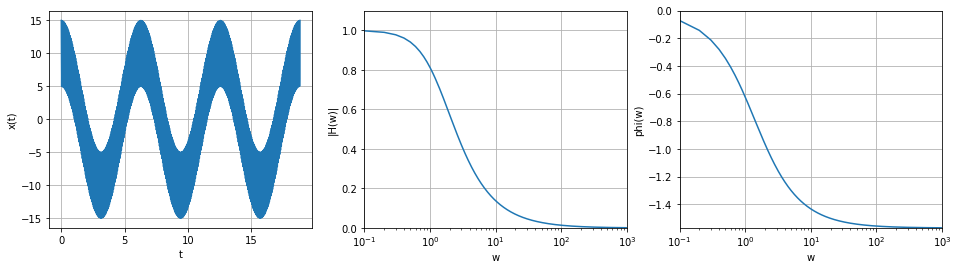

In [5]:
t = np.linspace(0,6*np.pi,10000)
c_1, c_2 = 10,5
w_1, w_2 = 1,100
x = c_1*np.exp(1j*w_1*t) + c_2*np.exp(1j*w_2*t)

def H(w):
    return 1/(.72*1j*w+1)
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.plot(t,x.real)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid()
plt.subplot(1,3,2)
w = np.linspace(0.1,1000,10000)
plt.plot(w,np.abs(H(w)))
plt.xscale('log')
plt.axis([.1,1000,0,1.1])
plt.xlabel('w')
plt.ylabel('|H(w)|')
plt.grid()
plt.subplot(1,3,3)
plt.plot(w,np.angle(H(w)))
plt.xscale('log')
plt.axis([.1,1000,-np.pi/2,0.0])
plt.xlabel('w')
plt.ylabel('phi(w)')
plt.grid()

/home/jupyter-holger/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


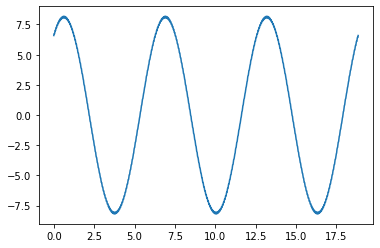

In [6]:
################    
# Your Code here
################    
plt.plot(t,c_1*H(w_1)*np.exp(1j*w_1*t) + c_2*H(w_2)*np.exp(1j*w_2*t))